# Ratul Chakraborty
# BDA 2nd Sem

In [1]:
import numpy as np
import pandas as pd
# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
import seaborn as sns

# Needed for generating training and testing datasets
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso , Ridge ,lasso_path , ridge_regression ,LassoLars ,lars_path

from scipy.optimize import minimize
import matplotlib.pyplot as plt

from matplotlib import cm
%matplotlib inline

# Read Dataset

#### Superconductivity dataset from UCI
[https://archive.ics.uci.edu/ml/datasets/superconductivty+data](https://archive.ics.uci.edu/ml/datasets/superconductivty+data)

In [2]:
df = pd.read_csv("train.csv")
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

# Filter dataset

In [4]:
filters = [col for col in df.columns if col.startswith("w")]
df_fil = df[filters]
df_fil

,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,wtd_entropy_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_gmean_fie,wtd_entropy_fie,wtd_range_fie,wtd_std_fie,...,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_range_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,wtd_gmean_Valence,wtd_entropy_Valence,wtd_range_Valence,wtd_std_Valence
0,57.862692,36.116612,1.062396,31.794921,53.622535,1010.268571,938.016780,0.791488,735.985714,355.562967,...,61.015189,0.621979,0.262848,57.127669,138.517163,2.257143,2.219783,1.066221,1.085714,0.437059
1,58.518416,36.396602,1.057755,36.161939,53.979870,1010.612857,938.745413,0.807078,743.164286,354.963511,...,61.372331,0.619735,0.567706,51.413383,139.630922,2.257143,2.210679,1.047221,1.128571,0.468606
2,57.885242,36.122509,0.975980,35.741099,53.656268,1010.820000,939.009036,0.773620,743.164286,354.804183,...,60.943760,0.619095,0.250477,57.127669,138.540613,2.271429,2.232679,1.029175,1.114286,0.444697
3,57.873967,36.119560,1.022291,33.768010,53.639405,1010.544286,938.512777,0.783207,739.575000,355.183884,...,60.979474,0.620535,0.257045,57.127669,138.528893,2.264286,2.226222,1.048834,1.100000,0.440952
4,57.840143,36.110716,1.129224,27.848743,53.588771,1009.717143,937.025573,0.805230,728.807143,356.319281,...,61.086617,0.624878,0.272820,57.127669,138.493671,2.242857,2.206963,1.096052,1.057143,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,53.095769,43.135565,1.254119,15.504479,43.202659,753.793333,750.570867,0.927050,427.546667,64.428777,...,111.537778,95.001493,0.634332,83.048889,46.595943,3.555556,3.519911,0.913658,2.168889,0.496904
21259,49.021367,32.867748,1.571630,7.353333,50.148287,989.819048,923.426093,0.988470,659.771429,345.450969,...,108.680590,1.577047,0.745515,76.176553,156.558695,2.047619,2.038991,1.337246,0.904762,0.212959
21260,95.609104,95.464320,0.530198,53.041104,5.405448,691.580000,689.480961,0.542120,370.180000,55.960000,...,57.400000,57.038314,0.559446,29.000000,6.800000,4.800000,4.781762,0.450561,3.200000,0.400000
21261,97.095602,96.901083,0.640883,31.115202,6.249958,706.969000,704.143255,0.648876,208.799000,64.702805,...,59.270000,58.781651,0.659671,15.250000,7.862385,4.690000,4.665819,0.577601,2.210000,0.462493


In [5]:
df_fil.isna().sum()
# No nan values here

wtd_mean_atomic_mass               0
wtd_gmean_atomic_mass              0
wtd_entropy_atomic_mass            0
wtd_range_atomic_mass              0
wtd_std_atomic_mass                0
wtd_mean_fie                       0
wtd_gmean_fie                      0
wtd_entropy_fie                    0
wtd_range_fie                      0
wtd_std_fie                        0
wtd_mean_atomic_radius             0
wtd_gmean_atomic_radius            0
wtd_entropy_atomic_radius          0
wtd_range_atomic_radius            0
wtd_std_atomic_radius              0
wtd_mean_Density                   0
wtd_gmean_Density                  0
wtd_entropy_Density                0
wtd_range_Density                  0
wtd_std_Density                    0
wtd_mean_ElectronAffinity          0
wtd_gmean_ElectronAffinity         0
wtd_entropy_ElectronAffinity       0
wtd_range_ElectronAffinity         0
wtd_std_ElectronAffinity           0
wtd_mean_FusionHeat                0
wtd_gmean_FusionHeat               0
w

In [6]:
df_fil.corr()

,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,wtd_entropy_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_gmean_fie,wtd_entropy_fie,wtd_range_fie,wtd_std_fie,...,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_range_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,wtd_gmean_Valence,wtd_entropy_Valence,wtd_range_Valence,wtd_std_Valence
wtd_mean_atomic_mass,1.000000,0.964085,-0.412666,0.716623,-0.089471,-0.522595,-0.508109,-0.129779,-0.420457,-0.492250,...,-0.058075,0.250226,0.025638,-0.108512,-0.350993,0.545587,0.548981,-0.331025,0.330904,0.077323
wtd_gmean_atomic_mass,0.964085,1.000000,-0.484664,0.673326,-0.331657,-0.612317,-0.588014,-0.227652,-0.451326,-0.617363,...,-0.056793,0.322335,0.020495,-0.129212,-0.431027,0.614100,0.623261,-0.448072,0.409674,0.030361
wtd_entropy_atomic_mass,-0.412666,-0.484664,1.000000,-0.543305,0.495970,0.531431,0.475331,0.698922,0.324119,0.731250,...,0.184949,-0.505488,0.182082,0.302974,0.684497,-0.644336,-0.650247,0.918284,-0.546910,-0.006937
wtd_range_atomic_mass,0.716623,0.673326,-0.543305,1.000000,-0.063091,-0.409287,-0.393395,-0.234053,-0.114267,-0.416195,...,-0.061016,0.287490,0.009108,-0.069206,-0.346224,0.445874,0.445201,-0.409599,0.594214,0.092819
wtd_std_atomic_mass,-0.089471,-0.331657,0.495970,-0.063091,1.000000,0.449619,0.406154,0.479914,0.226462,0.603438,...,0.058402,-0.346671,0.066305,0.155144,0.443604,-0.394987,-0.414098,0.606574,-0.391024,0.155702
wtd_mean_fie,-0.522595,-0.612317,0.531431,-0.409287,0.449619,1.000000,0.992331,0.079944,0.724828,0.835451,...,-0.094193,-0.533758,-0.263213,0.108706,0.509899,-0.551527,-0.551444,0.446614,-0.391221,-0.125622
wtd_gmean_fie,-0.508109,-0.588014,0.475331,-0.393395,0.406154,0.992331,1.000000,0.030222,0.711316,0.765892,...,-0.111828,-0.485905,-0.258152,0.077105,0.445802,-0.479924,-0.480221,0.382479,-0.340174,-0.105682
wtd_entropy_fie,-0.129779,-0.227652,0.698922,-0.234053,0.479914,0.079944,0.030222,1.000000,-0.280675,0.411288,...,0.219691,-0.269555,0.463915,0.203354,0.385669,-0.340946,-0.375613,0.862061,-0.454246,0.332966
wtd_range_fie,-0.420457,-0.451326,0.324119,-0.114267,0.226462,0.724828,0.711316,-0.280675,1.000000,0.576880,...,-0.063461,-0.356802,-0.332363,0.188550,0.432511,-0.460419,-0.438015,0.137482,0.061797,-0.307760
wtd_std_fie,-0.492250,-0.617363,0.731250,-0.416195,0.603438,0.835451,0.765892,0.411288,0.576880,1.000000,...,0.052139,-0.633475,-0.172232,0.265365,0.709665,-0.754516,-0.760538,0.724825,-0.565075,-0.098274


# Check Correlation and delete highly Correlated columns

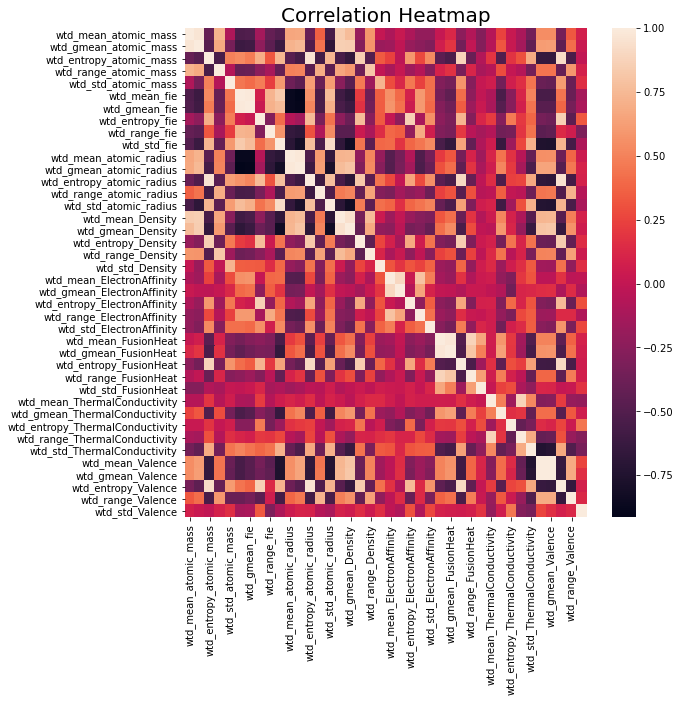

In [7]:
plt.figure(figsize = (9,9))
sns.heatmap(df_fil.corr())
plt.title("Correlation Heatmap", fontsize = 20)
plt.savefig("Heatmap.jpg")

In [8]:
def select(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (np.abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset.info())

In [9]:
select(df_fil, 0.6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   wtd_mean_atomic_mass             21263 non-null  float64
 1   wtd_entropy_atomic_mass          21263 non-null  float64
 2   wtd_std_atomic_mass              21263 non-null  float64
 3   wtd_mean_fie                     21263 non-null  float64
 4   wtd_range_atomic_radius          21263 non-null  float64
 5   wtd_mean_ElectronAffinity        21263 non-null  float64
 6   wtd_entropy_ElectronAffinity     21263 non-null  float64
 7   wtd_std_ElectronAffinity         21263 non-null  float64
 8   wtd_mean_FusionHeat              21263 non-null  float64
 9   wtd_mean_ThermalConductivity     21263 non-null  float64
 10  wtd_gmean_ThermalConductivity    21263 non-null  float64
 11  wtd_entropy_ThermalConductivity  21263 non-null  float64
 12  wtd_std_Valence   

In [10]:
df_fil.corr()

,wtd_mean_atomic_mass,wtd_entropy_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_range_atomic_radius,wtd_mean_ElectronAffinity,wtd_entropy_ElectronAffinity,wtd_std_ElectronAffinity,wtd_mean_FusionHeat,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_std_Valence
wtd_mean_atomic_mass,1.000000,-0.412666,-0.089471,-0.522595,0.363882,-0.096427,-0.093796,-0.210757,0.014681,-0.058075,0.250226,0.025638,0.077323
wtd_entropy_atomic_mass,-0.412666,1.000000,0.495970,0.531431,-0.572284,0.239710,0.591390,0.534124,-0.464303,0.184949,-0.505488,0.182082,-0.006937
wtd_std_atomic_mass,-0.089471,0.495970,1.000000,0.449619,-0.392248,0.286153,0.458664,0.418981,-0.283987,0.058402,-0.346671,0.066305,0.155702
wtd_mean_fie,-0.522595,0.531431,0.449619,1.000000,-0.554291,0.565534,0.093075,0.419650,-0.340745,-0.094193,-0.533758,-0.263213,-0.125622
wtd_range_atomic_radius,0.363882,-0.572284,-0.392248,-0.554291,1.000000,-0.311567,-0.228257,-0.382684,0.236613,-0.021518,0.356868,0.001180,-0.061663
wtd_mean_ElectronAffinity,-0.096427,0.239710,0.286153,0.565534,-0.311567,1.000000,0.028555,0.477634,-0.131661,0.061166,-0.215288,-0.297577,-0.010135
wtd_entropy_ElectronAffinity,-0.093796,0.591390,0.458664,0.093075,-0.228257,0.028555,1.000000,0.353035,-0.236483,0.088646,-0.289356,0.399722,0.303421
wtd_std_ElectronAffinity,-0.210757,0.534124,0.418981,0.419650,-0.382684,0.477634,0.353035,1.000000,-0.262495,0.061439,-0.356268,0.078877,0.264354
wtd_mean_FusionHeat,0.014681,-0.464303,-0.283987,-0.340745,0.236613,-0.131661,-0.236483,-0.262495,1.000000,0.061967,0.586597,0.202429,0.092672
wtd_mean_ThermalConductivity,-0.058075,0.184949,0.058402,-0.094193,-0.021518,0.061166,0.088646,0.061439,0.061967,1.000000,0.490187,-0.163613,-0.206584


# Train - Test Split

In [11]:
X_train, X_test, y_train,y_test = train_test_split(df_fil, df["critical_temp"], test_size=0.2, shuffle=False)

# OLS

In [35]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          critical_temp   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                              6799.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):                        0.00
Time:                        22:44:05   Log-Likelihood:                         -75899.
No. Observations:               17010   AIC:                                  1.518e+05
Df Residuals:                   16997   BIC:                                  1.519e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [36]:
res.params

wtd_mean_atomic_mass               -0.007009
wtd_entropy_atomic_mass            17.974941
wtd_std_atomic_mass                 0.245031
wtd_mean_fie                        0.013276
wtd_range_atomic_radius             0.007430
wtd_mean_ElectronAffinity          -0.142630
wtd_entropy_ElectronAffinity      -34.186726
wtd_std_ElectronAffinity            0.043746
wtd_mean_FusionHeat                 0.011245
wtd_mean_ThermalConductivity        0.536653
wtd_gmean_ThermalConductivity      -0.555836
wtd_entropy_ThermalConductivity    22.479186
wtd_std_Valence                   -15.248755
dtype: float64

# Sequential Gradient Descent

In [56]:
class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        self.__ws = []
        self.__bs = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
        self.__ws.append(self.W)
        self.__bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)

    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,j = float('inf'),0
        while True:
            cost=0
            for i in range(len(X)):
                h = np.dot(X[i],self.W)+self.b
                cost += self.__computeCost(h,y[i])
                self.__optimize(X[i],y[i])

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")
            if last_cost-cost < self.__tol: break
            else: last_cost,j = cost,j+1
            self.__costs.append(cost)
            self.__iterations.append(j)     

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))
  

X_train:(17010, 13)
y_train:(17010,)
Iteration: 0, Cost: 1374.943
Iteration: 1, Cost: 1337.351
Iteration: 2, Cost: 1301.842
Iteration: 3, Cost: 1268.257
Iteration: 4, Cost: 1236.454
Iteration: 5, Cost: 1206.302
Iteration: 6, Cost: 1177.679
Iteration: 7, Cost: 1150.475
Iteration: 8, Cost: 1124.588
Iteration: 9, Cost: 1099.926
Iteration: 10, Cost: 1076.403
Iteration: 11, Cost: 1053.940
Iteration: 12, Cost: 1032.465
Iteration: 13, Cost: 1011.912
Iteration: 14, Cost: 992.219
Iteration: 15, Cost: 973.332
Iteration: 16, Cost: 955.198
Iteration: 17, Cost: 937.770
Iteration: 18, Cost: 921.004
Iteration: 19, Cost: 904.860
Iteration: 20, Cost: 889.301
Iteration: 21, Cost: 874.292
Iteration: 22, Cost: 859.801
Iteration: 23, Cost: 845.800
Iteration: 24, Cost: 832.262
Iteration: 25, Cost: 819.161
Iteration: 26, Cost: 806.474
Iteration: 27, Cost: 794.180
Iteration: 28, Cost: 782.259
Iteration: 29, Cost: 770.693
Iteration: 30, Cost: 759.464
Iteration: 31, Cost: 748.556
Iteration: 32, Cost: 737.955
It

Iteration: 276, Cost: 252.952
Iteration: 277, Cost: 252.813
Iteration: 278, Cost: 252.676
Iteration: 279, Cost: 252.540
Iteration: 280, Cost: 252.405
Iteration: 281, Cost: 252.272
Iteration: 282, Cost: 252.141
Iteration: 283, Cost: 252.011
Iteration: 284, Cost: 251.882
Iteration: 285, Cost: 251.754
Iteration: 286, Cost: 251.628
Iteration: 287, Cost: 251.504
Iteration: 288, Cost: 251.380
Iteration: 289, Cost: 251.258
Iteration: 290, Cost: 251.137
Iteration: 291, Cost: 251.017
Iteration: 292, Cost: 250.899
Iteration: 293, Cost: 250.781
Iteration: 294, Cost: 250.665
Iteration: 295, Cost: 250.550
Iteration: 296, Cost: 250.436
Iteration: 297, Cost: 250.323
Iteration: 298, Cost: 250.211
Iteration: 299, Cost: 250.100
Iteration: 300, Cost: 249.991
Iteration: 301, Cost: 249.882
Iteration: 302, Cost: 249.774
Iteration: 303, Cost: 249.668
Iteration: 304, Cost: 249.562
Iteration: 305, Cost: 249.457
Iteration: 306, Cost: 249.354
Iteration: 307, Cost: 249.251
Iteration: 308, Cost: 249.149
Iteration:

Iteration: 550, Cost: 235.858
Iteration: 551, Cost: 235.824
Iteration: 552, Cost: 235.790
Iteration: 553, Cost: 235.756
Iteration: 554, Cost: 235.722
Iteration: 555, Cost: 235.689
Iteration: 556, Cost: 235.655
Iteration: 557, Cost: 235.622
Iteration: 558, Cost: 235.588
Iteration: 559, Cost: 235.555
Iteration: 560, Cost: 235.522
Iteration: 561, Cost: 235.489
Iteration: 562, Cost: 235.456
Iteration: 563, Cost: 235.423
Iteration: 564, Cost: 235.390
Iteration: 565, Cost: 235.357
Iteration: 566, Cost: 235.325
Iteration: 567, Cost: 235.292
Iteration: 568, Cost: 235.259
Iteration: 569, Cost: 235.227
Iteration: 570, Cost: 235.195
Iteration: 571, Cost: 235.162
Iteration: 572, Cost: 235.130
Iteration: 573, Cost: 235.098
Iteration: 574, Cost: 235.066
Iteration: 575, Cost: 235.034
Iteration: 576, Cost: 235.002
Iteration: 577, Cost: 234.971
Iteration: 578, Cost: 234.939
Iteration: 579, Cost: 234.907
Iteration: 580, Cost: 234.876
Iteration: 581, Cost: 234.844
Iteration: 582, Cost: 234.813
Iteration:

Iteration: 824, Cost: 229.048
Iteration: 825, Cost: 229.030
Iteration: 826, Cost: 229.012
Iteration: 827, Cost: 228.995
Iteration: 828, Cost: 228.977
Iteration: 829, Cost: 228.959
Iteration: 830, Cost: 228.941
Iteration: 831, Cost: 228.924
Iteration: 832, Cost: 228.906
Iteration: 833, Cost: 228.888
Iteration: 834, Cost: 228.871
Iteration: 835, Cost: 228.853
Iteration: 836, Cost: 228.836
Iteration: 837, Cost: 228.818
Iteration: 838, Cost: 228.801
Iteration: 839, Cost: 228.783
Iteration: 840, Cost: 228.766
Iteration: 841, Cost: 228.749
Iteration: 842, Cost: 228.732
Iteration: 843, Cost: 228.714
Iteration: 844, Cost: 228.697
Iteration: 845, Cost: 228.680
Iteration: 846, Cost: 228.663
Iteration: 847, Cost: 228.646
Iteration: 848, Cost: 228.629
Iteration: 849, Cost: 228.612
Iteration: 850, Cost: 228.595
Iteration: 851, Cost: 228.578
Iteration: 852, Cost: 228.561
Iteration: 853, Cost: 228.544
Iteration: 854, Cost: 228.527
Iteration: 855, Cost: 228.510
Iteration: 856, Cost: 228.494
Iteration:

Iteration: 1094, Cost: 225.344
Iteration: 1095, Cost: 225.334
Iteration: 1096, Cost: 225.323
Iteration: 1097, Cost: 225.313
Iteration: 1098, Cost: 225.303
Iteration: 1099, Cost: 225.293
Iteration: 1100, Cost: 225.282
Iteration: 1101, Cost: 225.272
Iteration: 1102, Cost: 225.262
Iteration: 1103, Cost: 225.252
Iteration: 1104, Cost: 225.242
Iteration: 1105, Cost: 225.232
Iteration: 1106, Cost: 225.222
Iteration: 1107, Cost: 225.212
Iteration: 1108, Cost: 225.202
Iteration: 1109, Cost: 225.191
Iteration: 1110, Cost: 225.181
Iteration: 1111, Cost: 225.171
Train Score: 0.6410629707814517
Test Score:  0.4497742379149493


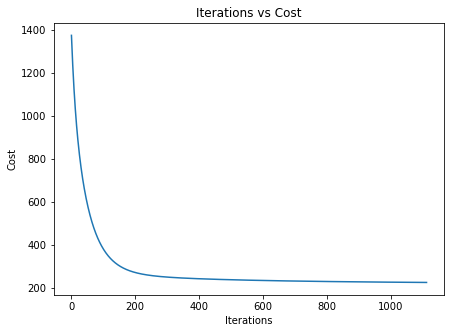

In [111]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

seq_regressor = Regressor(normalize=True)
seq_regressor.seq_fit(np.array(X_train),y_train)

train_score = r2_score(y_train,seq_regressor.predict(X_train))
test_score = r2_score(y_test,seq_regressor.predict(X_test))

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()

# Lasso

In [13]:
lass = Lasso(alpha=0.9).fit(X_train,y_train)

In [14]:
lass_cof = lass.coef_[lass.coef_ != 0]
lass_cof

array([-0.02581931,  0.15771089,  0.03893731, -0.02642006, -0.22600223,
        0.12318867, -0.01197447,  0.4986021 , -0.48852375,  0.99464454,
       -8.6680898 ])

In [15]:
r2_score(y_test, lass.predict(X_test))

0.49088913816710067

# Comparing Lasso and OLS

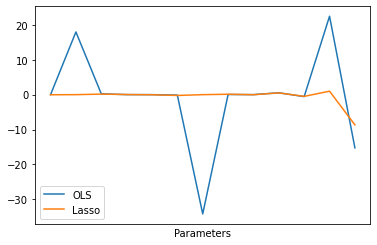

In [27]:
plt.plot(res.params)
plt.plot(lass.coef_)
plt.xticks("")
plt.xlabel("Parameters")
plt.legend(["OLS","Lasso"])
plt.savefig("ols_lasso.jpg")

# Ridge

In [18]:
ridgeR = Ridge(alpha = 0.9)
ridgeR.fit(X_train, y_train)

Ridge(alpha=0.9)

In [19]:
rid_cof = ridgeR.coef_
rid_cof

array([ 1.04170787e-02,  1.81263048e+01,  2.29626980e-01,  2.19426648e-02,
        1.85770250e-02, -1.50973877e-01, -3.32373773e+01,  4.29983444e-02,
        2.80951750e-02,  5.42064558e-01, -5.55571040e-01,  2.31635704e+01,
       -1.49442647e+01])

In [20]:
r2_score(y_test, ridgeR.predict(X_test))

0.364349822367217

# Comparing Ridge and OLS

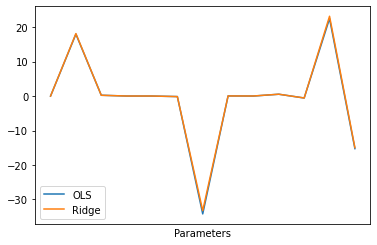

In [26]:
plt.plot(res.params)
plt.plot(rid_cof)
plt.xticks("")
plt.legend(["OLS","Ridge"])
plt.xlabel("Parameters")
plt.savefig("ols_ridge.jpg")

# Lasso Paths

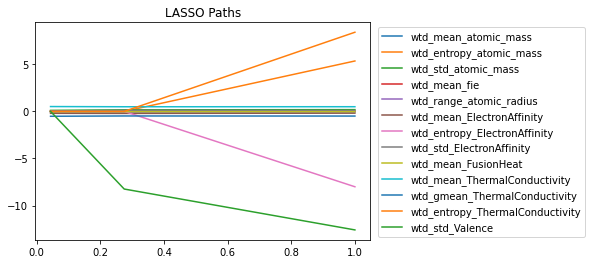

In [22]:
_, coefs, _ = lasso_path(X_train, y_train, alphas=[5., 1., .5])

xx = np.sum(np.abs(np.matrix(coefs.T)), axis=1)
xx /= xx[-1]

plt.plot(xx,coefs.T)
plt.title("LASSO Paths")
plt.legend(X_train.columns,loc = "best",bbox_to_anchor =(1.01, 1))
plt.savefig("lasso_path.jpg")

# Ridge Path

.

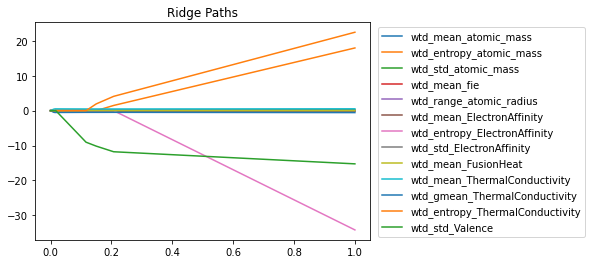

In [23]:
_,_,coefs = lars_path(np.array(X_train), np.array(y_train),method = "Ridge", verbose=True)

xx = np.sum(np.abs(np.matrix(coefs.T)), axis=1)
xx /= xx[-1]

plt.plot(xx,coefs.T)
plt.title("Ridge Paths")
plt.legend(X_train.columns,loc = "best",bbox_to_anchor =(1.01, 1))
plt.savefig("ridge_path.jpg")

# Comparison

In [41]:
compare = pd.DataFrame([res.params], index = ["OLS"]).T
compare["LASSO"] = lass.coef_
compare["RIDGE"] = rid_cof
compare

,OLS,LASSO,RIDGE
wtd_mean_atomic_mass,-0.007009,-0.025819,0.010417
wtd_entropy_atomic_mass,17.974941,0.000000,18.126305
wtd_std_atomic_mass,0.245031,0.157711,0.229627
wtd_mean_fie,0.013276,0.038937,0.021943
wtd_range_atomic_radius,0.007430,-0.026420,0.018577
wtd_mean_ElectronAffinity,-0.142630,-0.226002,-0.150974
wtd_entropy_ElectronAffinity,-34.186726,-0.000000,-33.237377
wtd_std_ElectronAffinity,0.043746,0.123189,0.042998
wtd_mean_FusionHeat,0.011245,-0.011974,0.028095
wtd_mean_ThermalConductivity,0.536653,0.498602,0.542065


# Plots for different alphas

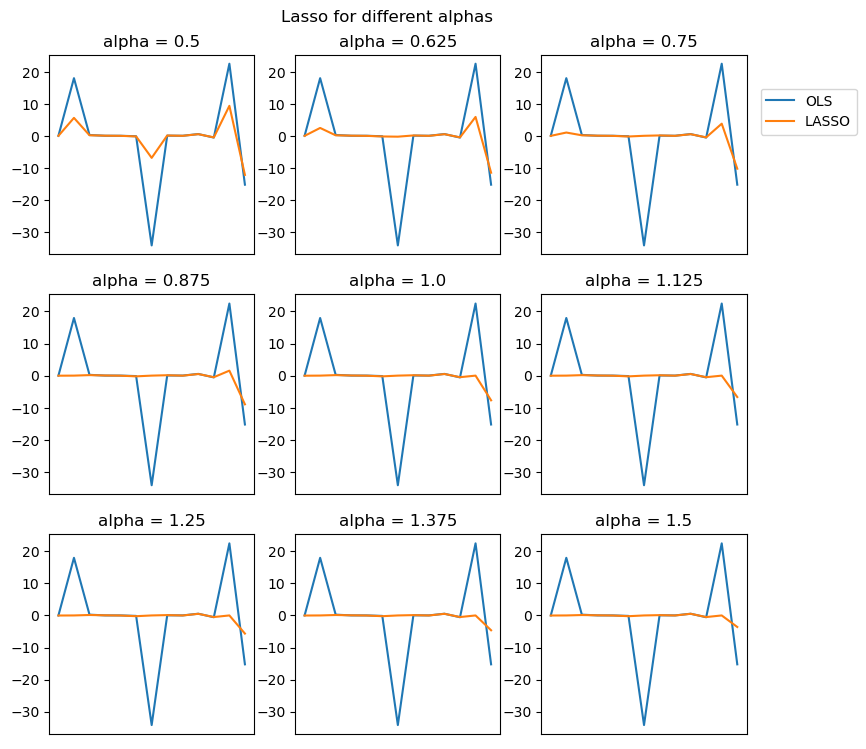

In [68]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, dpi = 100, figsize = (9,9))

lasso = []
alphas = np.linspace(0.5, 1.5, 9)
for i in alphas:
    la = Lasso(alpha=i).fit(X_train,y_train)
    lasso.append(la.coef_)

k = 0
for m in range(3):
    for n in range(3):
        axes[m][n].plot(res.params)
        axes[m][n].plot(lasso[k])
        axes[m][n].set_xticks("")
        axes[m][n].set_title(f"alpha = {alphas[k]}")
        k += 1
fig.legend(["OLS", "LASSO"], bbox_to_anchor = (1.03, 0.85))
fig.suptitle("Lasso for different alphas", y = 0.93)
plt.savefig("Multiple_alphas.jpg")

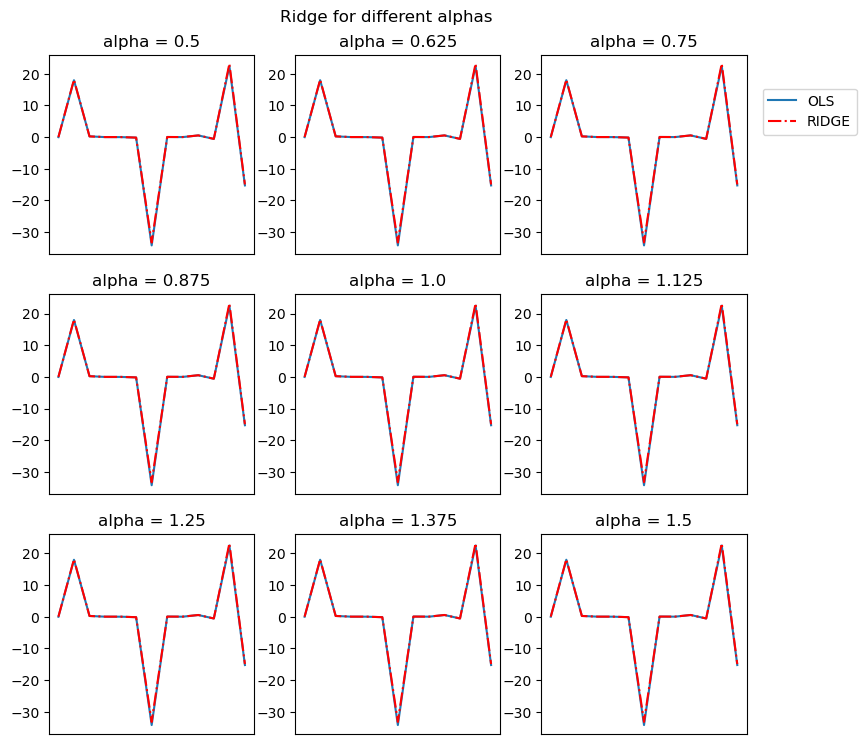

In [76]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, dpi = 100, figsize = (9,9))

rig = []
alphas = np.linspace(0.5, 1.5, 9)
for i in alphas:
    ri = Ridge(alpha=i).fit(X_train,y_train)
    rig.append(ri.coef_)

k = 0
for m in range(3):
    for n in range(3):
        axes[m][n].plot(res.params)
        axes[m][n].plot(rig[k], "r-.")
        axes[m][n].set_xticks("")
        axes[m][n].set_title(f"alpha = {alphas[k]}")
        k += 1
fig.legend(["OLS", "RIDGE"], bbox_to_anchor = (1.03, 0.85))
fig.suptitle("Ridge for different alphas", y = 0.93)
plt.savefig("Multiple_alphas_ridge.jpg")
# They are nearly complete overlap

In [ ]:
# Fin ------------